# OilyGiant Data Analytics

# Profit Margin Recommendations

## Introduction

The purpose of this study is to recommend potential future oil wells with highest volume of reserves that yield highest possible profit margins and least amount of losses amoungst candidates presented by OilyGiant Mining Company. 

This analysis will seek to achieve four main goals:

- Use provided data to collect oil well parameters in selected region (oil quality, volume of reserves).

- Use obtained parameters to build model that predicts volume of reserves in proposed wells.

- Use predictions to obtain wells with highest estimated values.

- Use estimated values to recommend region with highest total profit for selected wells.

Established conditions for this study include:

 - Model training will be based on regression.
 
 - Region exploration yields 500 potential points out of which best 200 for profit calculation are choosen.
 
 - Bugdet for 200 oil wells is 100 USD million.
 
 - One barrel of raw materials =  4.5 USD of revenue. One unit of product = 4,500 dollars of revenue (volume of reserves is in thousand barrels).
 
 - Risk evaluation should only yield regions with 2.5% risk of losses. From regions fitting this criteria, region yielding highest average profit should be recommmended.

Datasets provided consist of the following features:

* id — unique oil well identifier

* f0, f1, f2 - features of points.

* product - volume of reserves in well (thousand barrels).

### Import Libraries

In [60]:
# Import nessecary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score

### Load Data

In [61]:
# Load datasets into variables
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

### View Data 

We will begin by reviewing the datasets by both displaying them and their information.

In [62]:
# Display dataset 1
display(geo_data_0)
geo_data_0.info()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [63]:
# Display dataset 2
display(geo_data_1)
geo_data_1.info()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [64]:
# Display dataset 3
display(geo_data_2)
geo_data_2.info()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Datasets identify 100,000 points for well sites in each region. Dataset information shows datatypes appear to be in order.

## Training and Testing Model

In this stage data will be used to train a models for each region to obtain average volume of predicted reserves and RSME for each model. As stated previously, model training will be based on linear regression. 

In [65]:
# Remove id column from datasets for model training
region_1_data = geo_data_0.drop("id", axis=1)
region_2_data = geo_data_1.drop("id", axis=1)
region_3_data = geo_data_2.drop("id", axis=1)

In [66]:
# Indentify features/target for each dataset
# Region 1
features_region_1 = region_1_data.drop("product", axis=1)
target_region_1 = region_1_data["product"] 

# Region 2
features_region_2 = region_2_data.drop("product", axis=1)
target_region_2 = region_2_data["product"] 

# Region 3
features_region_3 = region_3_data.drop("product", axis=1)
target_region_3 = region_3_data["product"] 

We have removed the point indentifier("id") column from the datasets in order to isolate desired features for spliting. Both features and target for each region has have been identified.

### Spliting Data

Data for each region will be split in a 75:25 ratio for training and validation sets respectively. 

In [67]:
# Region 1 trainig/validation split
features_region_1_train, features_region_1_valid, target_region_1_train, target_region_1_valid = train_test_split(features_region_1, target_region_1, test_size=0.25, random_state=12345)

# Region 2 trainig/validation split
features_region_2_train, features_region_2_valid, target_region_2_train, target_region_2_valid = train_test_split(features_region_2, target_region_2, test_size=0.25, random_state=12345)

# Region 3 trainig/validation split
features_region_3_train, features_region_3_valid, target_region_3_train, target_region_3_valid = train_test_split(features_region_3, target_region_3, test_size=0.25, random_state=12345)

In [68]:
# Confirm shape of datasets
print(features_region_1_train.shape)
print(target_region_1_train.shape)
print(features_region_1_valid.shape)
print(target_region_1_valid.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


Training and validations sets are in order and ready for use.

### Model Training

Model will be trained with linear regression and made to predict on validation sets for all three regions. Process will take place using function which should train model, make predictions, obtain average volume of product reserves per region and evaluate their RMSE. 

In [69]:
# Define function to train model for regions
def train_predict_calculate(features_train, target_train, features_valid, target_valid):
    
    # Initialize and train model
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    # Predict product reserves
    predictions = model.predict(features_valid)
    
    # Calculate average predicted reserves
    average_predicted_reserves = np.mean(predictions)
    
    # Calculate RMSE
    rmse = mean_squared_error(target_valid, predictions, squared=False)
    
    return predictions, average_predicted_reserves, rmse    

### Apply Function and Obtain Variables

Applying funciton to data will provide necessary values to evaluate and compare regions. Our function should provide the predictions for each region as well as average volume of reserve and RMSE value for comparison.

In [70]:
# Region 1 
predictions_1, avg_reserves_1, rmse_1 = train_predict_calculate(features_region_1_train, target_region_1_train, features_region_1_valid, target_region_1_valid)

# Region 2
predictions_2, avg_reserves_2, rmse_2 = train_predict_calculate(features_region_2_train, target_region_2_train, features_region_2_valid, target_region_2_valid)

# Region 3
predictions_3, avg_reserves_3, rmse_3 = train_predict_calculate(features_region_3_train, target_region_3_train, features_region_3_valid, target_region_3_valid)

### View Average Predicted Reserves and Model RMSE

We can now compare the average volume of reserves and RMSE for each region.

Region 1 - Average Predcited Reserves: 92.59, RMSE: 37.58
Region 2 - Average Predcited Reserves: 68.73, RMSE: 0.89
Region 3 - Average Predcited Reserves: 94.97, RMSE: 40.03


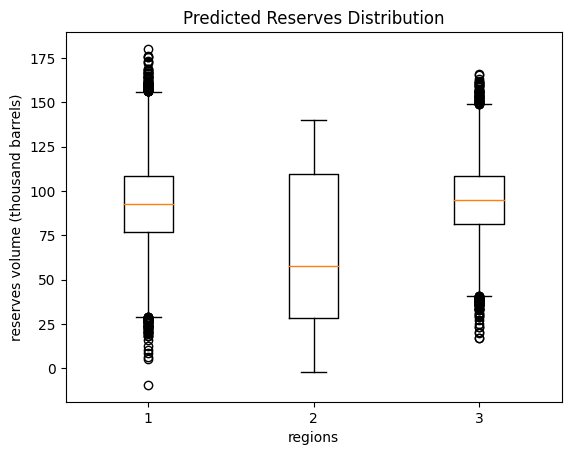

In [71]:
# Region 1
print(f"Region 1 - Average Predcited Reserves: {avg_reserves_1:.2f}, RMSE: {rmse_1:.2f}") 

# Region 2
print(f"Region 2 - Average Predcited Reserves: {avg_reserves_2:.2f}, RMSE: {rmse_2:.2f}") 

# Region 3
print(f"Region 3 - Average Predcited Reserves: {avg_reserves_3:.2f}, RMSE: {rmse_3:.2f}")

# Plot predicted reserves distribution
plt.boxplot(pd.DataFrame(data={'region_1': predictions_1, 'region_2': predictions_2, 'region_3': predictions_3}))
plt.xlabel('regions')
plt.ylabel('reserves volume (thousand barrels)')
plt.title('Predicted Reserves Distribution')
plt.show()

As shown in the figure predicted volume of reserves for region 1 shows a greater distribution of reserves. Average reserves for both region 1 and 2 appear above 90 but less than 100 units, according to the chart medians appear to follow average quantities. While region 2 only reaches average reserves of 68.73 units, its 25 and 75 percentiles posses greater distribution ranging from above 25 to slightly greater than both region 1 and 2. RMSE obtained for both region 1 and 2 appear close to 40 while error for region 2 is only 0.89. 

## Preparing Profit Calculation

Preparing for profit calculation will begin with storing key values provided in isolated variables.

### Key Values

Provided values for calculatiuon include:

In [72]:
# Constants
total_budget = 100000000

number_of_wells = 200

revenue_per_unit = 4500

# Calculate cost of one well
single_well_cost = total_budget/number_of_wells

print("Cost of producing one oil well:", single_well_cost)

Cost of producing one oil well: 500000.0


### Expected Reserves to Develop with No Loss

Having the cost of producing a single well and the revenue produced by a unit of product (1000 barrels), we can acertain that:

In [73]:
# Calculate reserves per oil well to break even
break_even_reserves = single_well_cost/revenue_per_unit

print("Required reserves per oil well to develop without loss:", break_even_reserves)

Required reserves per oil well to develop without loss: 111.11111111111111


### Preparation Findings

As we can see the amount of required reserves to develop a well without losses is higher than the average reserves in all regions.

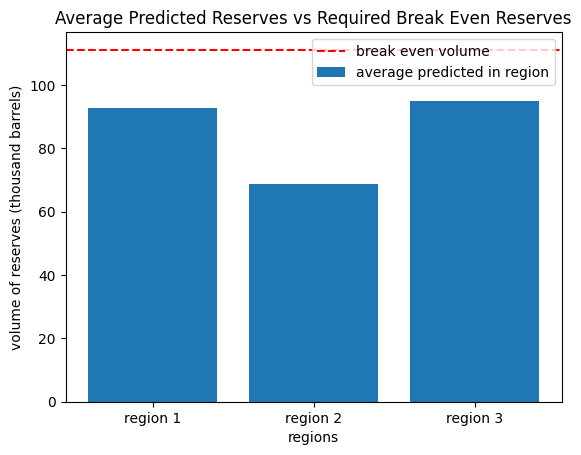

In [74]:
# Plot average reserves per region with break even threshold 
categories = ['region 1', 'region 2', 'region 3']
values = [avg_reserves_1, avg_reserves_2, avg_reserves_3]
threshold = break_even_reserves
plt.axhline(y=threshold, color='red', linestyle='--')
plt.bar(categories, values)
plt.legend(['break even volume', 'average predicted in region'])
plt.title("Average Predicted Reserves vs Required Break Even Reserves")
plt.xlabel("regions")
plt.ylabel("volume of reserves (thousand barrels)")
plt.show()

As seen in chart average volume of reserve do not surpass 100 units. Profit calculation should then consider regions with highest model predictions. In accordance to given budget, profit calculation should be obtained for top 200 potential well sites.

## Profit Calculation

Key values and variables will be used to calculate profit in the form of a function which will consider wells with highest values of volume predictions.

### Selecting Top Wells in Regions Based on Predictions

Profit calculation function will recieve as parameters the obtained model predictions in order to assess top potential wells in actual validation set target data. Selected wells will be based on the top 200 predicted reserves.

In [75]:
# Define profit funtion
def calculate_profit(predictions, target, revenue, budget):
    
    # Convert target/predicitons to series
    target = pd.Series(target)
    predictions = pd.Series(predictions, index=target.index)
    
    # Sort top predictions
    predictions_sorted = predictions.sort_values(ascending=False)[:200].index
    
    # Select top wells
    top_wells = target.loc[predictions_sorted]
    
    # Calculate total revenue
    total_revenue = (top_wells * revenue).sum()
    
    # Calculate total profit
    region_profit = total_revenue - budget
    
    return region_profit

Passing our mentioned parameters into funciton will return a regions total profit.

### Suggested Region Based on Total Profit

We now provide the required parameters for the profit caculation function using the regional target validation sets.

In [76]:
# Region 1
profit_region_1 = calculate_profit(predictions_1, target_region_1_valid, revenue_per_unit, total_budget)

# Region 1
profit_region_2 = calculate_profit(predictions_2, target_region_2_valid, revenue_per_unit, total_budget)

# Region 1
profit_region_3 = calculate_profit(predictions_3, target_region_3_valid, revenue_per_unit, total_budget)

Results show:

Total profit region 1: 33208260.43139851
Total profit region 2: 24150866.966815084
Total profit region 3: 27103499.63599831


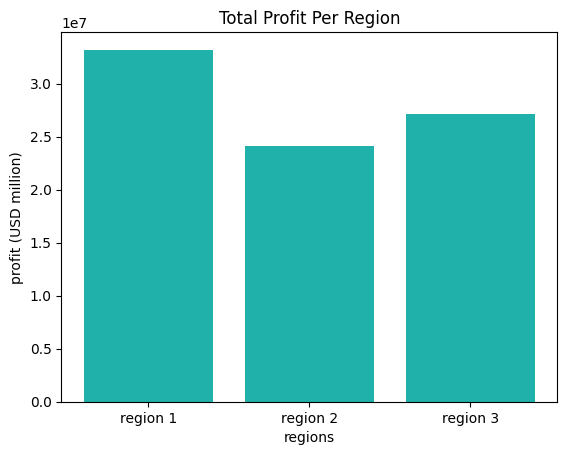

In [87]:
# Print results
print("Total profit region 1:", profit_region_1)
print("Total profit region 2:", profit_region_2)
print("Total profit region 3:", profit_region_3)

# PLot profit chart
categories = ['region 1', 'region 2', 'region 3']
values = [profit_region_1, profit_region_2, profit_region_3]
plt.bar(categories, values, color='lightseagreen')
plt.title("Total Profit Per Region")
plt.xlabel("regions")
plt.ylabel("profit (USD million)")
plt.show()

Total profit calculation per region for the top 200 wells based on predictions shows region 1 to provide highest profit at around 33 million dls. Region 2 shows profit of 24 (USD million) and region 3 a profit of 27 (USD million). Based on total predictions of current data, region 1 would be the suggested region for oil well construction. 

Because this suggestion was made based on fixed predictions of feature data, a new potential well will not follow the same distribution of feature points, which will lead to a different distribution of profit and risk off losses. To predict actual distribution of profit and potential risk, we will be sampling from data for a confidence interval of profit as well as an average based on sample means. 

## Average Profit and Risk Calculation

In order to simulate potential well data we will generate 1000 samples of 500 random well points of our regional data for bootstraping. Out of which profit will be obtained using our function which will calculate profit based on the highest 200 predictions of the samples provided. Sample means should result in a representative average of regional profit as well as risk of profit loss for each region. 

### Boostrap Function

Function for boostraping data will recieve target and predicitons data to perform sampling and calculation.

In [89]:
# Define boostrap function
def bootstrap_profit(target, predictions, revenue, budget):
    
    # Convert target/predicitons to series
    target = pd.Series(target)
    predictions = pd.Series(predictions, index=target.index)
    
    # Create random state
    state = np.random.RandomState(12345)
    
    # Bootstrap profit values
    profit_values = []
    
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        predictions_location = predictions[target_subsample.index]
        profit_values.append(calculate_profit(predictions_location, target_subsample, revenue, budget))
    
    profit_values = pd.Series(profit_values)
    
    # Obtain 95% confidence interval
    upper = profit_values.quantile(q=0.975)
    lower = profit_values.quantile(q=0.025)
    conf_interval = f"({round(lower, 2)}, {round(upper, 2)})"
    
    # Calculate profit average
    average_profit = round(profit_values.mean(), 2)
    
    # Calculate risk of loss
    risk_of_loss = f"{np.mean(profit_values < 0) * 100}%"
    
    return profit_values, conf_interval, average_profit, risk_of_loss

### Confidence Interval, Average Profit and Risk of Loss Calculation

The function will return a 95% confidence interval of profit distribution as well as the average mean of samples. Risk of loss will be caculated as negative profit from the obtained sample means to express as percentage out of the 1000 bootstrap samples.

In [90]:
# Apply function to regional data

# Region 1
profit_values_1, conf_interval_1, average_profit_1, risk_of_loss_1 = bootstrap_profit(target_region_1_valid, predictions_1, revenue_per_unit, total_budget)

# Region 2
profit_values_2, conf_interval_2, average_profit_2, risk_of_loss_2 = bootstrap_profit(target_region_2_valid, predictions_2, revenue_per_unit, total_budget)

# Region 3
profit_values_3, conf_interval_3, average_profit_3, risk_of_loss_3 = bootstrap_profit(target_region_3_valid, predictions_3, revenue_per_unit, total_budget)

### Results

Results will be shown by direct quantities as well as implementing a fuction to plot the obtained distribution of profit.

In [150]:
# Create profit ploting funciton
def plot_profit_dist(profit_series, lower, upper, chart_color, title):
    plt.figure(figsize=(7, 5))
    profit_series.plot(kind='hist', bins=30, density=True, alpha=0.6, color=chart_color, edgecolor='black')
    
    # obtain mean and standard deviation
    mean_profit = profit_series.mean()
    std_deviation = profit_series.std()
    
    # Create Average profit and confidence interval lines
    plt.axvline(x=lower, color='red', linestyle='--')
    plt.axvline(x=upper, color='red', linestyle='--')
    plt.axvline(mean_profit, color='aqua')
    
    # plot distribution curve
    pdf = (1 / (std_deviation * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_profit) / std_deviation) ** 2)
    plt.plot(x, pdf, 'k', linewidth=2)
    
    # Add labels
    plt.title(title)
    plt.xlabel('profit (USD million)')
    plt.ylabel('density')
    plt.legend(['.25 percentile', '97.5 percentile', f'average profit: {mean_profit:.2f}'])
    plt.grid(True)
    
    plt.show()

#### Region 1

Region 1
95% confidence interval: (129483.31, 12311636.06)
Average profit: 6007352.44
Risk of loss: 2.0%



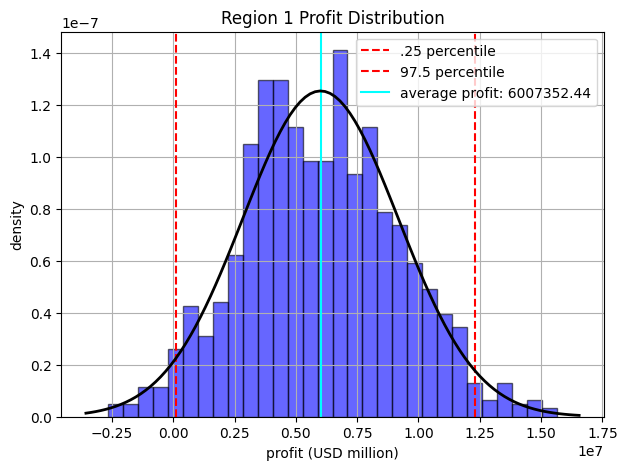

In [151]:
# Plot Region 1 results
print(f"Region 1\n95% confidence interval: {conf_interval_1}\nAverage profit: {average_profit_1}\nRisk of loss: {risk_of_loss_1}\n")
plot_profit_dist(profit_values_1, 129483.31, 12311636.06, 'blue', 'Region 1 Profit Distribution')

Region 1 shows to have a confidence interval of **(129483.31, 12311636.06)** with an average profit of **6007352.44** and a risk of loss of **2.0%**. 

#### Region 2

Region 2
95% confidence interval: (1579884.81, 11976415.87)
Average profit: 6652410.58
Risk of loss: 0.3%



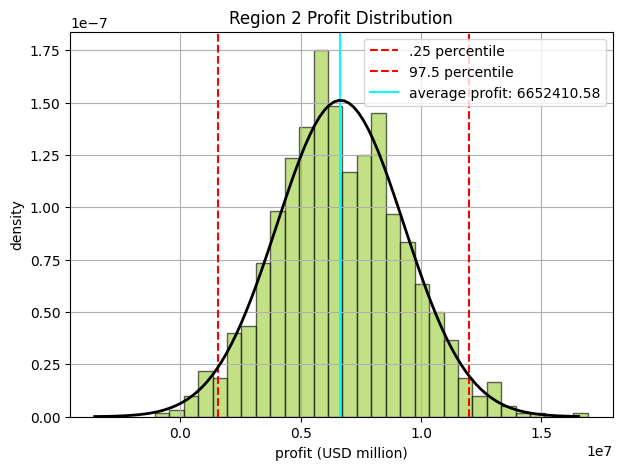

In [155]:
# Plot Region 2 results
print(f"Region 2\n95% confidence interval: {conf_interval_2}\nAverage profit: {average_profit_2}\nRisk of loss: {risk_of_loss_2}\n")
plot_profit_dist(profit_values_2, 1579884.81, 11976415.87, 'yellowgreen', 'Region 2 Profit Distribution')

Region 2 shows to have a confidence interval of **(1579884.81, 11976415.87)** with an average profit of **6652410.58** and a risk of loss of less than **1%**. 

#### Region 3

Region 3
95% confidence interval: (-122184.95, 12306444.74)
Average profit: 6155597.23
Risk of loss: 3.0%



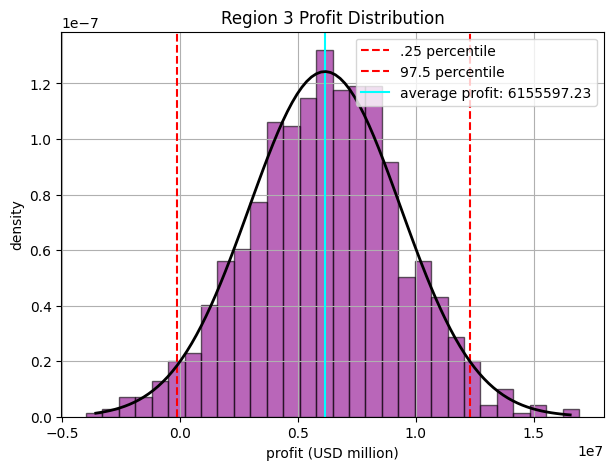

In [156]:
# Plot Region 3 results
print(f"Region 3\n95% confidence interval: {conf_interval_3}\nAverage profit: {average_profit_3}\nRisk of loss: {risk_of_loss_3}\n")
plot_profit_dist(profit_values_3, -122184.95, 12306444.74, 'darkmagenta', 'Region 3 Profit Distribution')

Region 2 shows to have a confidence interval of **(-122184.95, 12306444.74)** with an average profit of **6155597.23** and exhibits highest risk of loss at **3.0%**.

## Conclusion

Based on boostraped data samples and profit calculations relating to highest model predictions, we suggest **region 2** for new oil well construction. Results in suggested region show:

- Region posseses highest average profit at 6652410.58 USD million this is 5 USD million more than other regions.

- .25 percentile in region shows at least 1579884.81 USD million in profit.

- Region has least risk of loss at 0.3% compared to others, 2.0% and 3.0%

While region 1 shows highest predicted profits of current data, sampled data with randomization shows **region 2** to be the most reliable region for oil well construction.